In [2]:
import numpy as np

# 1: young
# 2: mid
# 3: old

X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])


In [3]:
import pandas as pd

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df


,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


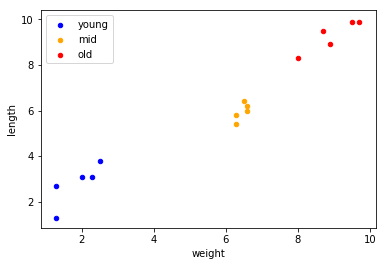

In [4]:
%matplotlib inline

ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='old', ax=ax)
ax


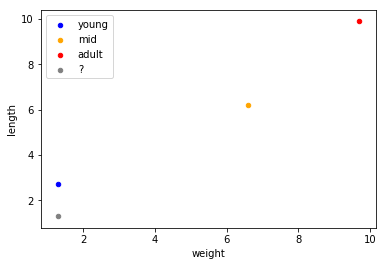

In [5]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)
ax


In [6]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))


In [9]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1]
print(" x0:", x0, " x1:", x1, " x4:", x4, " x14:", x14)


(' x0:', array([6.6, 6.2]), ' x1:', array([9.7, 9.9]), ' x4:', array([1.3, 2.7]), ' x14:', array([1.3, 1.3]))


In [12]:
# small value is the most similar one
print("x14 and x0:", euclidean_distance(x14, x0)) 
print("x14 and x1:", euclidean_distance(x14, x1))
print("x14 and x4:", euclidean_distance(x14, x4))


('x14 and x0:', 7.218032973047436)
('x14 and x1:', 12.021647141718974)
('x14 and x4:', 1.4000000000000001)


In [13]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [17]:
# high value is the most similar for cosine similarity
# but cosine distance is different from similarity
# cosine distance = 1 - cos similarity
print("x14 and x0:", 1-cosine_similarity(x14, x0))
print("x14 and x1:", 1-cosine_similarity(x14, x1))
print("x14 and x4:", 1-cosine_similarity(x14, x4))


('x14 and x0:', 0.00048792391292140636)
('x14 and x1:', 5.205757571413727e-05)
('x14 and x4:', 0.05614164363398255)


In [18]:
def manhattan_distance(x,y):
    
    return np.sum(np.absolute(x - y))

In [19]:
# small value is the most similar one
print("x14 and x0:", manhattan_distance(x14, x0)) 
print("x14 and x1:", manhattan_distance(x14, x1))
print("x14 and x4:", manhattan_distance(x14, x4))

('x14 and x0:', 10.2)
('x14 and x1:', 17.0)
('x14 and x4:', 1.4000000000000001)


In [21]:
def chi_square_distance(x,y):
    return 0.5 * (np.sum(((x - y) ** 2) / (x + y)))

In [22]:
# small value is the most similar one
print("x14 and x0:", chi_square_distance(x14, x0)) 
print("x14 and x1:", chi_square_distance(x14, x1))
print("x14 and x4:", chi_square_distance(x14, x4))

('x14 and x0:', 3.37851476793249)
('x14 and x1:', 6.50905844155844)
('x14 and x4:', 0.24500000000000005)
